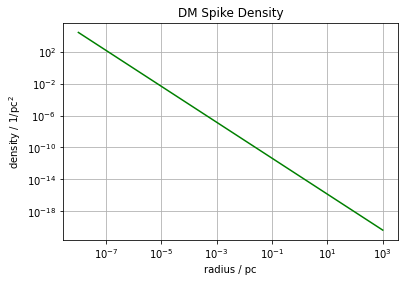

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import imripy
from imripy import merger_system as ms
from scipy.interpolate import interp1d
from matplotlib.ticker import FormatStrFormatter
from scipy.optimize import curve_fit
from numpy import diff

π = np.pi
G = 4.4959e-15            #in units of M☉^-1 pc^3 yr^-2
c = 0.3068                #in units of pc yr^-1
ρ_eq = 3.1812e3           #in units of M☉ pc^-3 with ρ_eq=2.15368e-16 kg m^-3
t_m = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr
yr = 3.154e7              # in units of seconds
t_eq = 1.59246e12/yr      # in units of yr
M_solar = 1.989e30


# Definition of the binary system 
m_bar = 1
m1 =  m_bar * ms.solar_mass_to_pc   # The central mass m1 with a mass of 1 solar masses, converted to pc


m2 = 1e-3 * ms.solar_mass_to_pc   # The secondary mass of 1e-3 solar mass converted to pc

D_luminosity = 5e8              # The distance to the system from earth as 500 Mpc



ρ_bar = (ρ_eq/2) * (t_eq**(3/2)) * ((2 * G * m_bar)**(3/4))



# Dark matter spike with alpha=9/4 for Primordial black holes case
r_spike = 1  # in parsecs, Choosen by choice

alpha = 9/4

rho_spike =  ρ_bar * (r_spike**(-alpha)) * ms.solar_mass_to_pc  # This takes the value of M_sun/pc^3 and converts it to 1/pc^2

spike = imripy.halo.Spike(rho_spike, r_spike, alpha)




# Plot density
r_grid = np.geomspace(1e-8, 1e3, 100)  # creates a grid in pc
plt.loglog(r_grid, spike.density(r_grid), 'g')
plt.grid()
plt.xlabel("radius / pc")
plt.ylabel("density / 1/pc$^2$")
plt.title('DM Spike Density')
plt.savefig('spike density.pdf')
plt.show()

Evolving from  3000.0  to  1.0 r_isco  with initial eccentricity 0.99  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
A termination event occurred.
 -> Evolution took 1.4751s
Evolving from  3000.0  to  1.0 r_isco  with initial eccentricity 0.895  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
A termination event occurred.
 -> Evolution took 1.7489s
Evolving from  3000.0  to  1.0 r_isco  with initial eccentricity 0.8  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
A termination event occurred.
 -> Evolution took 1.7187s
Evolving from  2500.0  to  1.0 r_isco  with initial eccentricity 0.99  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
A termination event occurred.
 -> Evolution took 1.4230s
Evolving from  2500.0  to  1.0 r_isco  with initial eccentricity 0.895  with  Options: accretion = False, haloPhaseSpaceDescription = Fa

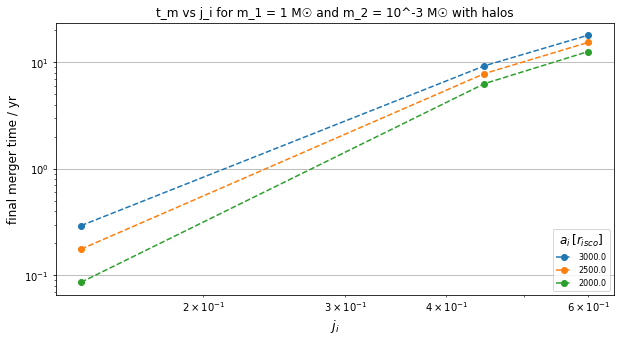

In [7]:
sp = ms.SystemProp(m1, m2, spike, D_luminosity)   # Create the SystemProp object describing the IMRI system

# Setting initial and final conditions of the binary evolution for an eccentric orbit

a0_array = np.linspace(3000,2000, 3)

e0_array = np.linspace(0.99, 0.80, 3) 

a0_list = a0_array.tolist()            

e0_list = e0_array.tolist()


a_fin = sp.r_isco()      # Choosen equal to r_icso

R_fin = sp.r_isco()      # The final condition for the evolution



plt.figure(figsize = (10, 5))
t_m_list = np.zeros(len(e0_list))
j_i_list = np.zeros(len(e0_list))


for i, a0 in enumerate (a0_list):
    for k, e0 in enumerate (e0_list):
        a0 = a0_list[i] * sp.r_isco()
        e_0 = e0_list[k] 
        j_i_list[k] = np.sqrt(1 - (e0**2))
        ev_ecc = imripy.inspiral.Classic.Evolve(sp, a0 , e_0,  a_fin = R_fin)
        t_m_list[k] = ev_ecc.t[-1]/ms.year_to_pc
    plt.loglog(j_i_list, t_m_list, '--o')
    
    
    
plt.legend([ '%0.1f'% a0_list[0], '%0.1f'% a0_list[1], '%0.1f'% a0_list[2] ], 
           title= '$a_{i} \hspace{0.2} [r_{isco}]$', 
            title_fontsize = 12, loc = 'lower right', prop = {"size":8})
plt.xlabel('$j_{i}$', fontsize = 13)
plt.ylabel('final merger time / yr', fontsize = 12)
plt.title('t_m vs j_i for m_1 = 1 M☉ and m_2 = 10^-3 M☉ with halos')
plt.savefig(' t_m vs j_i.pdf')
plt.grid()
plt.show()